In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_519977cc7c6f43fa92aadd29094ef30f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Xxkbk5BRjtnnCw-Xf6VHHbGjaIFRwSjCYWkLJ_jv1r6K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_519977cc7c6f43fa92aadd29094ef30f.get_object(Bucket='myproject-donotdelete-pr-nrfxuuskeyep1b',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
df.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [5]:
x=df['YearsExperience']

In [6]:
x

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [8]:
x=df.iloc[:,0:1].values

In [9]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [10]:
type(x)

numpy.ndarray

In [11]:
x.shape

(30, 1)

In [12]:
x.size

30

In [13]:
y=df['Salary']

In [14]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [16]:
y=df.iloc[:,-1:].values

In [17]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [19]:
y.shape

(30, 1)

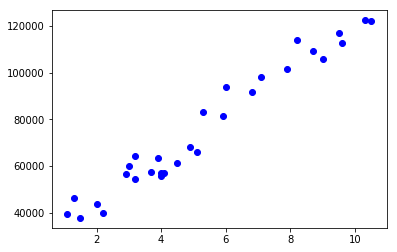

In [22]:
plt.scatter(x,y,color='blue')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
y_pred=model.predict(x_test)

In [33]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [34]:
y_test

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.]])

In [35]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

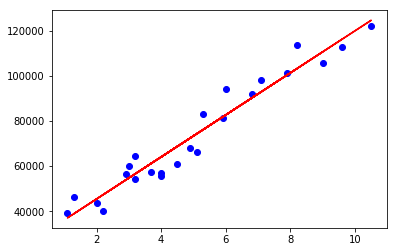

In [38]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,model.predict(x_train),color='red')

Text(0.5, 1.0, 'Salary Prediction')

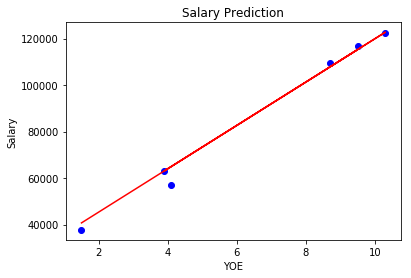

In [40]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')
plt.xlabel("YOE")
plt.ylabel("Salary")
plt.title("Salary Prediction")

In [44]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [42]:
wml_credentials = {
  "apikey": "onCKl9iP8rg1WRNKPr-2itI-02jxTqI2ScTdec-pFedv",
  "iam_apikey_description": "Auto-generated for key 1c676f41-fb3e-4e31-b777-ee1f42065637",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/fc7be899c250492bb60bc10f8ab153fa::serviceid:ServiceId-33ca349c-d6f2-4328-a6ca-7d44d521695b",
  "instance_id": "efc68ee6-b799-4901-87c4-648c27e3bfb6",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [45]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [48]:
metadata={
    client.repository.ModelMetaNames.AUTHOR_NAME: "SHUBHAM",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "shubham.sirothiya@gmail.com",
    client.repository.ModelMetaNames.NAME: "SalaryDataPrediction"
}

In [49]:
stored_data= client.repository.store_model(model,meta_props=metadata)

In [50]:
stored_data

{'metadata': {'guid': '0114ecdd-f4be-496c-bce2-0dfa7eeb3d5d',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/efc68ee6-b799-4901-87c4-648c27e3bfb6/published_models/0114ecdd-f4be-496c-bce2-0dfa7eeb3d5d',
  'created_at': '2020-06-14T12:13:47.082Z',
  'modified_at': '2020-06-14T12:13:47.134Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/efc68ee6-b799-4901-87c4-648c27e3bfb6/published_models/0114ecdd-f4be-496c-bce2-0dfa7eeb3d5d/learning_configuration',
  'author': {'name': 'SHUBHAM'},
  'name': 'SalaryDataPrediction',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/efc68ee6-b799-4901-87c4-648c27e3bfb6/published_models/0114ecdd-f4be-496c-bce2-0dfa7eeb3d5d/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/efc68ee6-b799-4901-87c4-648c27e3bfb6/published_models/0114ecdd-f4be-496c-bce2-0dfa7eeb3d5d/feedback',
  'latest_version': {'ur

In [51]:
guid= client.repository.get_model_uid(stored_data)

In [52]:
guid

'0114ecdd-f4be-496c-bce2-0dfa7eeb3d5d'

In [53]:
deploy= client.deployments.create(guid)



#######################################################################################

Synchronous deployment creation for uid: '0114ecdd-f4be-496c-bce2-0dfa7eeb3d5d' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2ef54664-47a1-498f-b831-fdcfda65f1c4'
------------------------------------------------------------------------------------------------




In [55]:
client.deployments.list()

------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
2ef54664-47a1-498f-b831-fdcfda65f1c4  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-14T12:18:09.759Z  scikit-learn-0.20  model
------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------


In [56]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)

In [57]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/efc68ee6-b799-4901-87c4-648c27e3bfb6/deployments/2ef54664-47a1-498f-b831-fdcfda65f1c4/online'